In [1]:
pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
import requests
from bs4 import BeautifulSoup
import re

def get_content(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response
    else:
        print("Failed to fetch content from URL:", url)
        return None

url = 'https://www.ettoday.net/?from=logo'
response = get_content(url)
soup = BeautifulSoup(response.text, 'html.parser') #標籤樹
lates_news = soup.find_all('div', class_="piece")
#print(len(lates_news))
hrefs = []
for a in lates_news:
    try:
        href = a.find('a')['href']
        hrefs.append(href)
    except:
        continue
    #cleaned_content = re.sub(r'<.*?>', '', a.text.strip())
    #print(cleaned_content)
#print(articles[0].text)
'''
content = response.content
if content:
    print("Content fetched successfully!")
else:
    exit()
#print(content)

# 將 content 使用正則表達式清洗資料
#cleaned_content = re.sub(r'<[^>]+>', '', content.decode("utf-8"))  # 去除 HTML 標籤
cleaned_content = re.sub(r'<.*?>', '', content.decode("utf-8"))  # 去除 HTML 標籤

# 測試清洗後的內容
print("Cleaned content:")
print(cleaned_content)  # 僅列印前 1000 個字元，避免輸出過多
'''



'\ncontent = response.content\nif content:\n    print("Content fetched successfully!")\nelse:\n    exit()\n#print(content)\n\n# 將 content 使用正則表達式清洗資料\n#cleaned_content = re.sub(r\'<[^>]+>\', \'\', content.decode("utf-8"))  # 去除 HTML 標籤\ncleaned_content = re.sub(r\'<.*?>\', \'\', content.decode("utf-8"))  # 去除 HTML 標籤\n\n# 測試清洗後的內容\nprint("Cleaned content:")\nprint(cleaned_content)  # 僅列印前 1000 個字元，避免輸出過多\n'

In [98]:
import pandas as pd


def get_article_info(url):
    response_ = get_content(url)
    soup = BeautifulSoup(response_.text, 'html.parser') #標籤樹
    title = ""
    content = ""
    author = ""
    date = ""
    try: 
        title = soup('h1', class_="title")[0].text
        story = soup('div', class_="story")[0]
        storys = story('p')
        date = soup('time', class_="date")[0].text
        for p in storys:
            if (p.text[0:2] == "記者") :
                author = p.text
            else :
                content += p.text
    except:
        i = 1
    return {'date': date, 'title': title, 'author': author, 'content': content}
data = []
for href in hrefs:
    dict = get_article_info(href)
    if (len(dict['content']) == 0):
        continue
    data.append(dict)
df = pd.DataFrame(data)
'''
def structure_content(cleaned_content):
    # 在這裡您可以根據網站內容的結構進行處理，例如提取標題、段落等
    # 這裡只是一個示例，您可以根據實際情況進行修改
    structured_data = {
        "article": [soup('a')],
        "provider": [soup('div', class_="vr1PYe")],
        "time": [soup('time', class_="hvbAAd")]
    }
    dataframe = pd.DataFrame(structured_data)
    return dataframe, structured_data

dataframe, structured_data = structure_content(cleaned_content)
print("DataFrame:")
print(dataframe.head())

print("\nDictionary:")
print(structured_data)
'''


'\ndef structure_content(cleaned_content):\n    # 在這裡您可以根據網站內容的結構進行處理，例如提取標題、段落等\n    # 這裡只是一個示例，您可以根據實際情況進行修改\n    structured_data = {\n        "article": [soup(\'a\')],\n        "provider": [soup(\'div\', class_="vr1PYe")],\n        "time": [soup(\'time\', class_="hvbAAd")]\n    }\n    dataframe = pd.DataFrame(structured_data)\n    return dataframe, structured_data\n\ndataframe, structured_data = structure_content(cleaned_content)\nprint("DataFrame:")\nprint(dataframe.head())\n\nprint("\nDictionary:")\nprint(structured_data)\n'

In [99]:
df.head()

date   
0  \n                                    2024-05-...  \
1  \r\n                                          ...   
2                                  2024年05月01日 16:01   
3  \r\n                                          ...   
4  \r\n                                          ...   

                              title          author   
0        P2P爆雷！旭新科技突聲明　暫停提領出金、債權再轉讓      記者陳瑩欣／台北報導  \
1     台中明星國小363新生「入學爆炸」　鄰校隔條路竟只有59人      記者游瓊華／台中報導   
2      獨／五月天香港舞台起火！　「消防車緊急灌救」現場狀況曝光      記者翁子涵／台北報導   
3  2天1夜等嘸加班機！金門1200旅客滯留機場　抗議怒吼：我要回家  記者林名揚、郭玗潔／金門報導   
4    性愛片遭男友外流　19歲妹自暴自棄「賣片56部」：報復渣男！      記者蔡紹堅／綜合報導   

                                             content  
0  ▲金管會外觀。（圖／ETtoday資料照）網路借貸平台imB營運爭議剛滿1年，新的「同業」爆...  
1  ▲台中市賴厝國小是北區明星學校，許多家長跨區設籍只為了將孩子送進國小。（圖／市議員陳俞融提供...  
2  ▲五月天移師香港開唱。（圖／資料照，相信音樂提供）\n五月天相隔1年再度來到香港，昨起於中環...  
3  ▲金門機場滯留1200名旅客，旅客等無航班抗議。（圖／記者林名揚翻攝，下同）金門從昨(30)...  
4  上海一對19歲的小情侶因自拍性愛影片並販售，於日前被警方逮捕。女主角麗麗（化名）告訴警方，男...

In [100]:
# 輸出 CSV 檔案
df.to_csv("et_today.csv", index=False)

# 輸出 JSON 檔案
import json
with open("et_today.json", "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False)

print("CSV and JSON files saved successfully!")


CSV and JSON files saved successfully!


In [101]:
df.head()

date   
0  \n                                    2024-05-...  \
1  \r\n                                          ...   
2                                  2024年05月01日 16:01   
3  \r\n                                          ...   
4  \r\n                                          ...   

                              title          author   
0        P2P爆雷！旭新科技突聲明　暫停提領出金、債權再轉讓      記者陳瑩欣／台北報導  \
1     台中明星國小363新生「入學爆炸」　鄰校隔條路竟只有59人      記者游瓊華／台中報導   
2      獨／五月天香港舞台起火！　「消防車緊急灌救」現場狀況曝光      記者翁子涵／台北報導   
3  2天1夜等嘸加班機！金門1200旅客滯留機場　抗議怒吼：我要回家  記者林名揚、郭玗潔／金門報導   
4    性愛片遭男友外流　19歲妹自暴自棄「賣片56部」：報復渣男！      記者蔡紹堅／綜合報導   

                                             content  
0  ▲金管會外觀。（圖／ETtoday資料照）網路借貸平台imB營運爭議剛滿1年，新的「同業」爆...  
1  ▲台中市賴厝國小是北區明星學校，許多家長跨區設籍只為了將孩子送進國小。（圖／市議員陳俞融提供...  
2  ▲五月天移師香港開唱。（圖／資料照，相信音樂提供）\n五月天相隔1年再度來到香港，昨起於中環...  
3  ▲金門機場滯留1200名旅客，旅客等無航班抗議。（圖／記者林名揚翻攝，下同）金門從昨(30)...  
4  上海一對19歲的小情侶因自拍性愛影片並販售，於日前被警方逮捕。女主角麗麗（化名）告訴警方，男...

In [102]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from community import community_louvain

import jieba
import jieba.analyse
import re

In [114]:
def keep_chinese_chars(text):
    pattern = re.compile(r'[^\u4e00-\u9fff]')
    chinese_text = re.sub(pattern, '', text)
    return chinese_text

def extract_keywords(text):
    text = keep_chinese_chars(text)
    return jieba.analyse.extract_tags(text, topK=10)

df['keywords'] = df['content'].apply(extract_keywords)

In [105]:
keywords

['火警', '發生', '余姓', '棉被', '國宅', '屋主', '人員', '現場', '發現', '住家']

In [104]:
#!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
from matplotlib.font_manager import fontManager
# 改style要在改font之前
# plt.style.use('seaborn')
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

In [115]:
def draw(df):
    G = nx.Graph()

    for i, row in df.iterrows():
        #content = row['content']
        author = row['author']
        keywords = row['keywords']

        G.add_node(author, type='author')

        for keyword in keywords:
            G.add_node(keyword, type='keyword')
            G.add_edge(author, keyword)
    partition = community_louvain.best_partition(G)

    community_colors = [partition[node] for node in G.nodes()]

    cmap = plt.cm.jet
    colors_with_alpha = [cmap(community_color / max(community_colors)) for community_color in community_colors]

    colors_with_alpha = [(r, g, b, 0.3) for r, g, b, _ in colors_with_alpha]

    node_sizes = [200 * G.degree(node) for node in G.nodes()]

    pos = nx.spring_layout(G, k=0.2, iterations=80)

    plt.figure(figsize=(30, 30))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_nodes(G, pos, node_color=colors_with_alpha, node_size=node_sizes, cmap=plt.cm.jet)
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='Taipei Sans TC Beta')

    plt.axis('off')
    plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


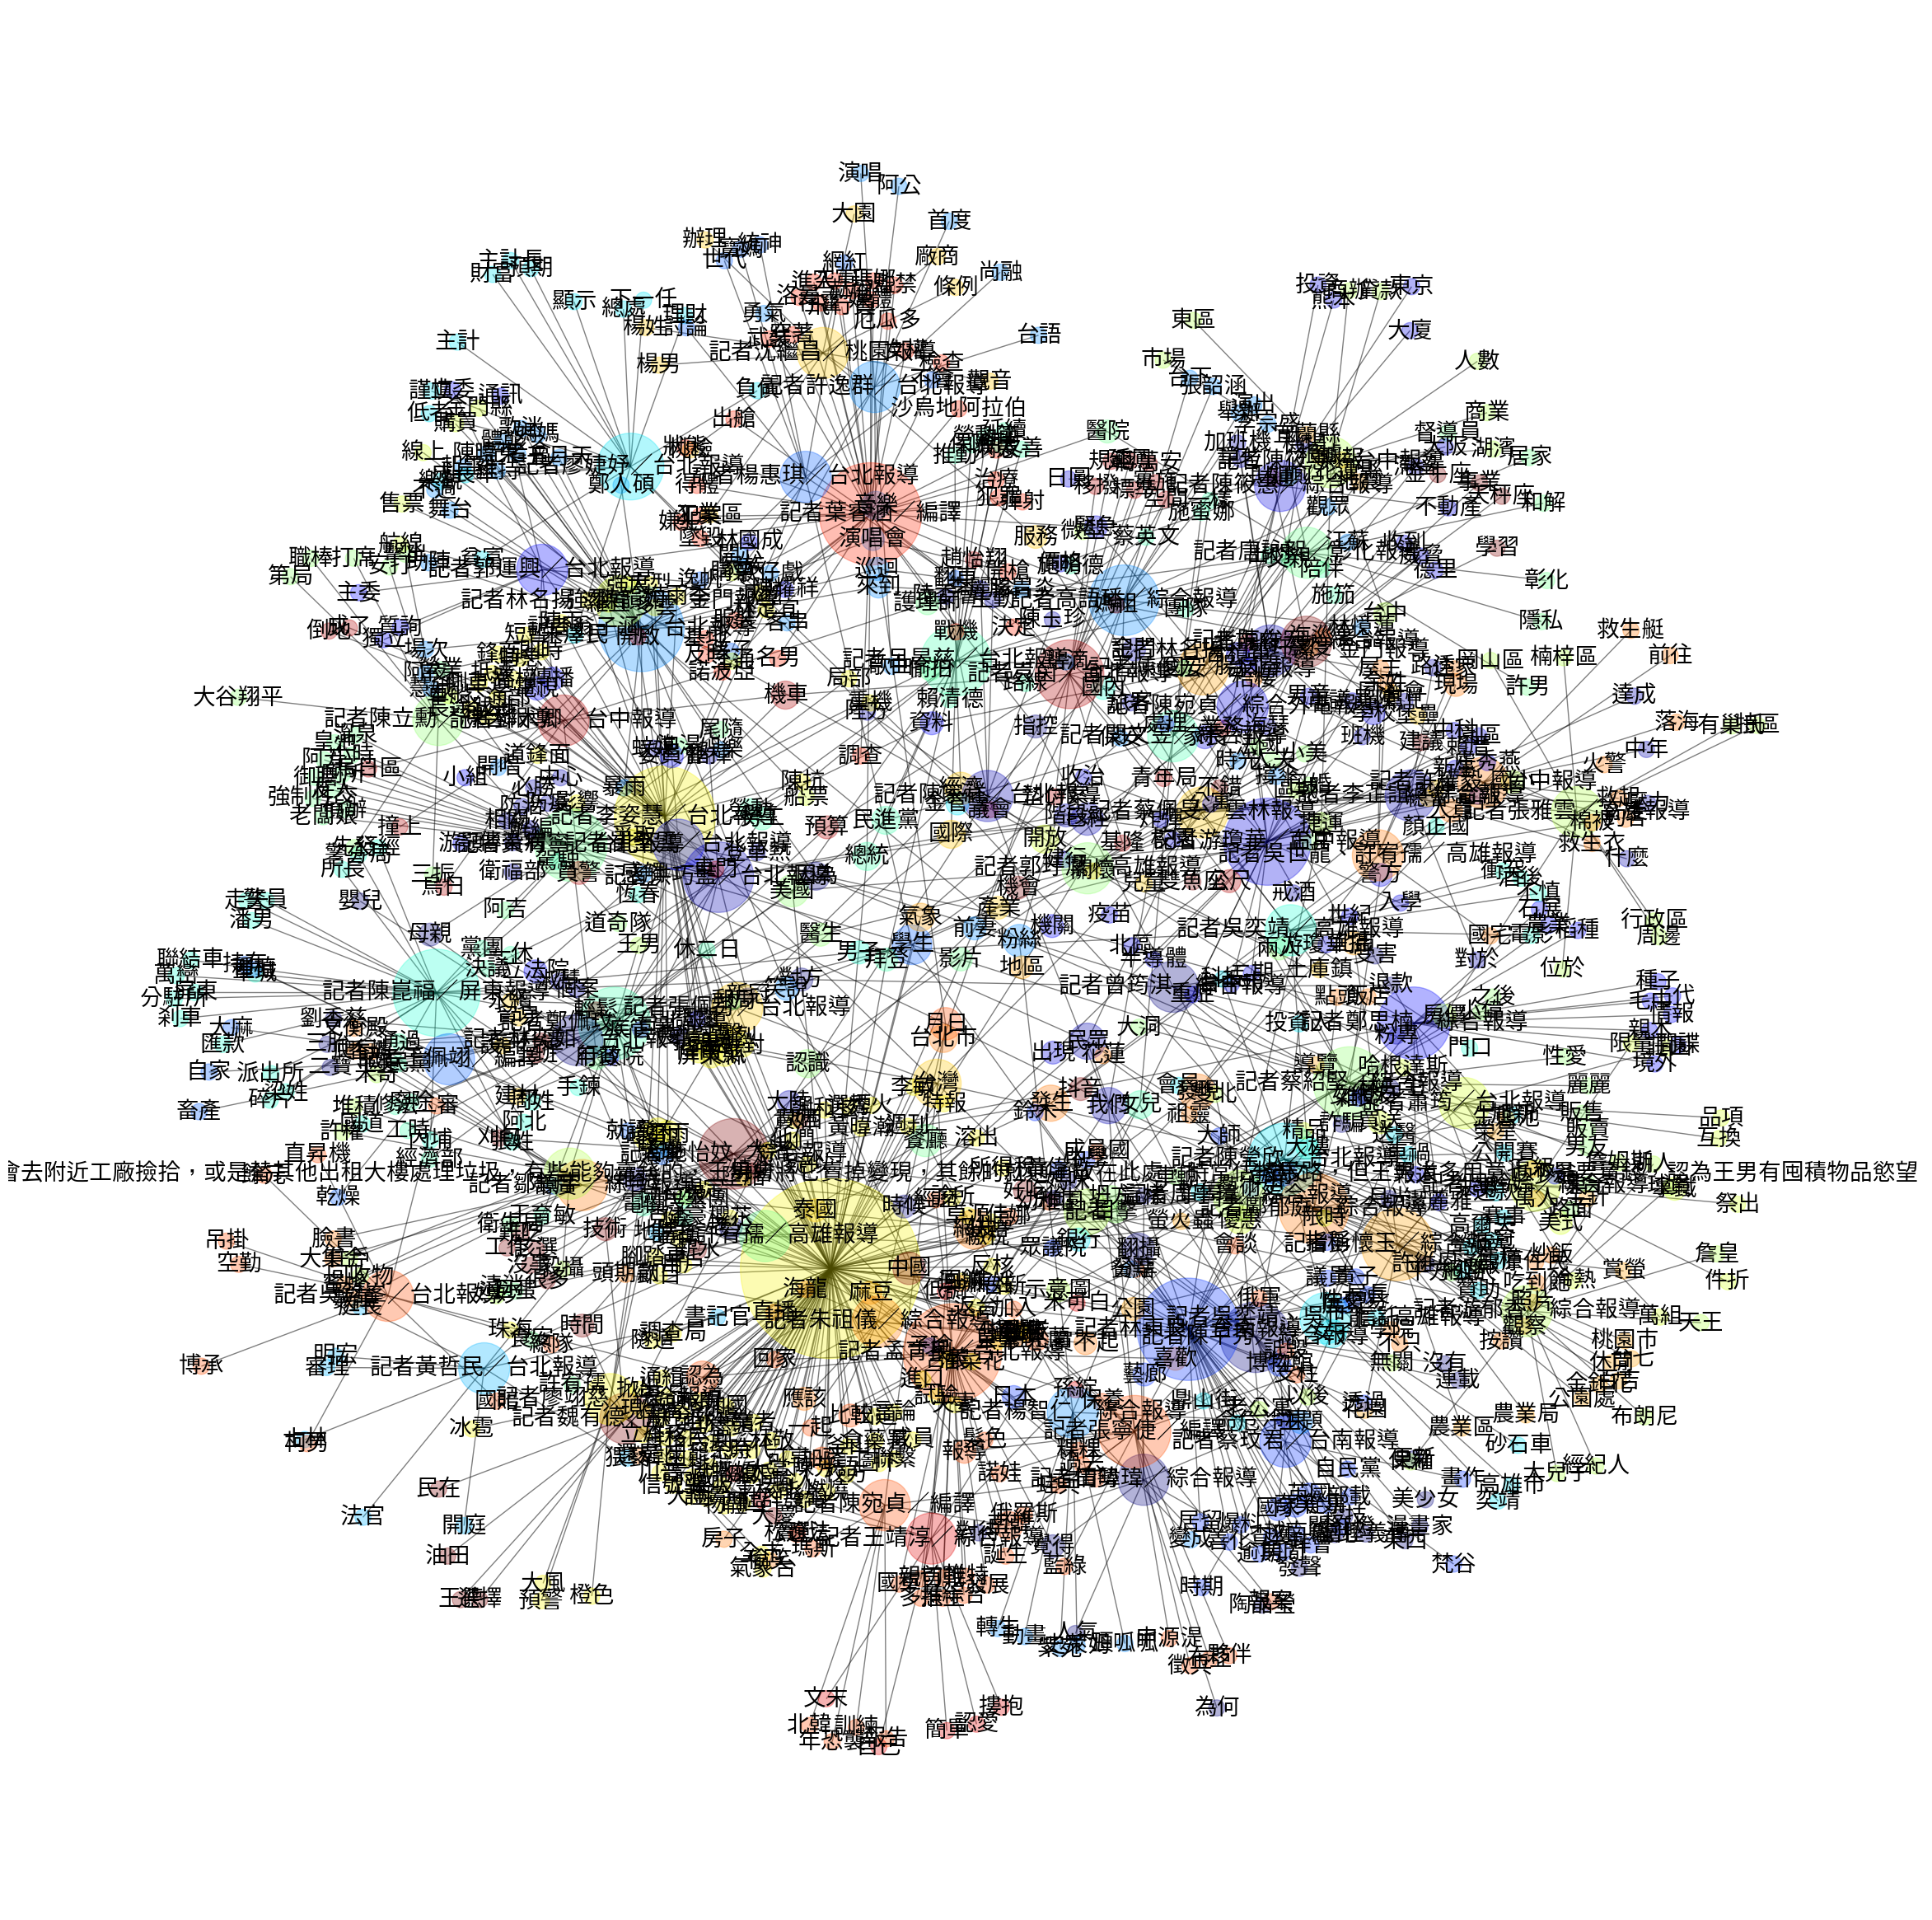

In [116]:
draw(df)

In [67]:
!pip install transformers torch

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [73]:
from transformers import AutoModelForCausalLM, AutoTokenizer


In [75]:
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import torch

def bart_summarize(text):

    keep_chinese_chars(text)

    tokenizer = BertTokenizer.from_pretrained('hfl/chinese-bert-wwm')
    model = BertForMaskedLM.from_pretrained('hfl/chinese-bert-wwm')

    inputs = tokenizer(text, return_tensors="pt", max_length=100, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=128)

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['cls.seq_r

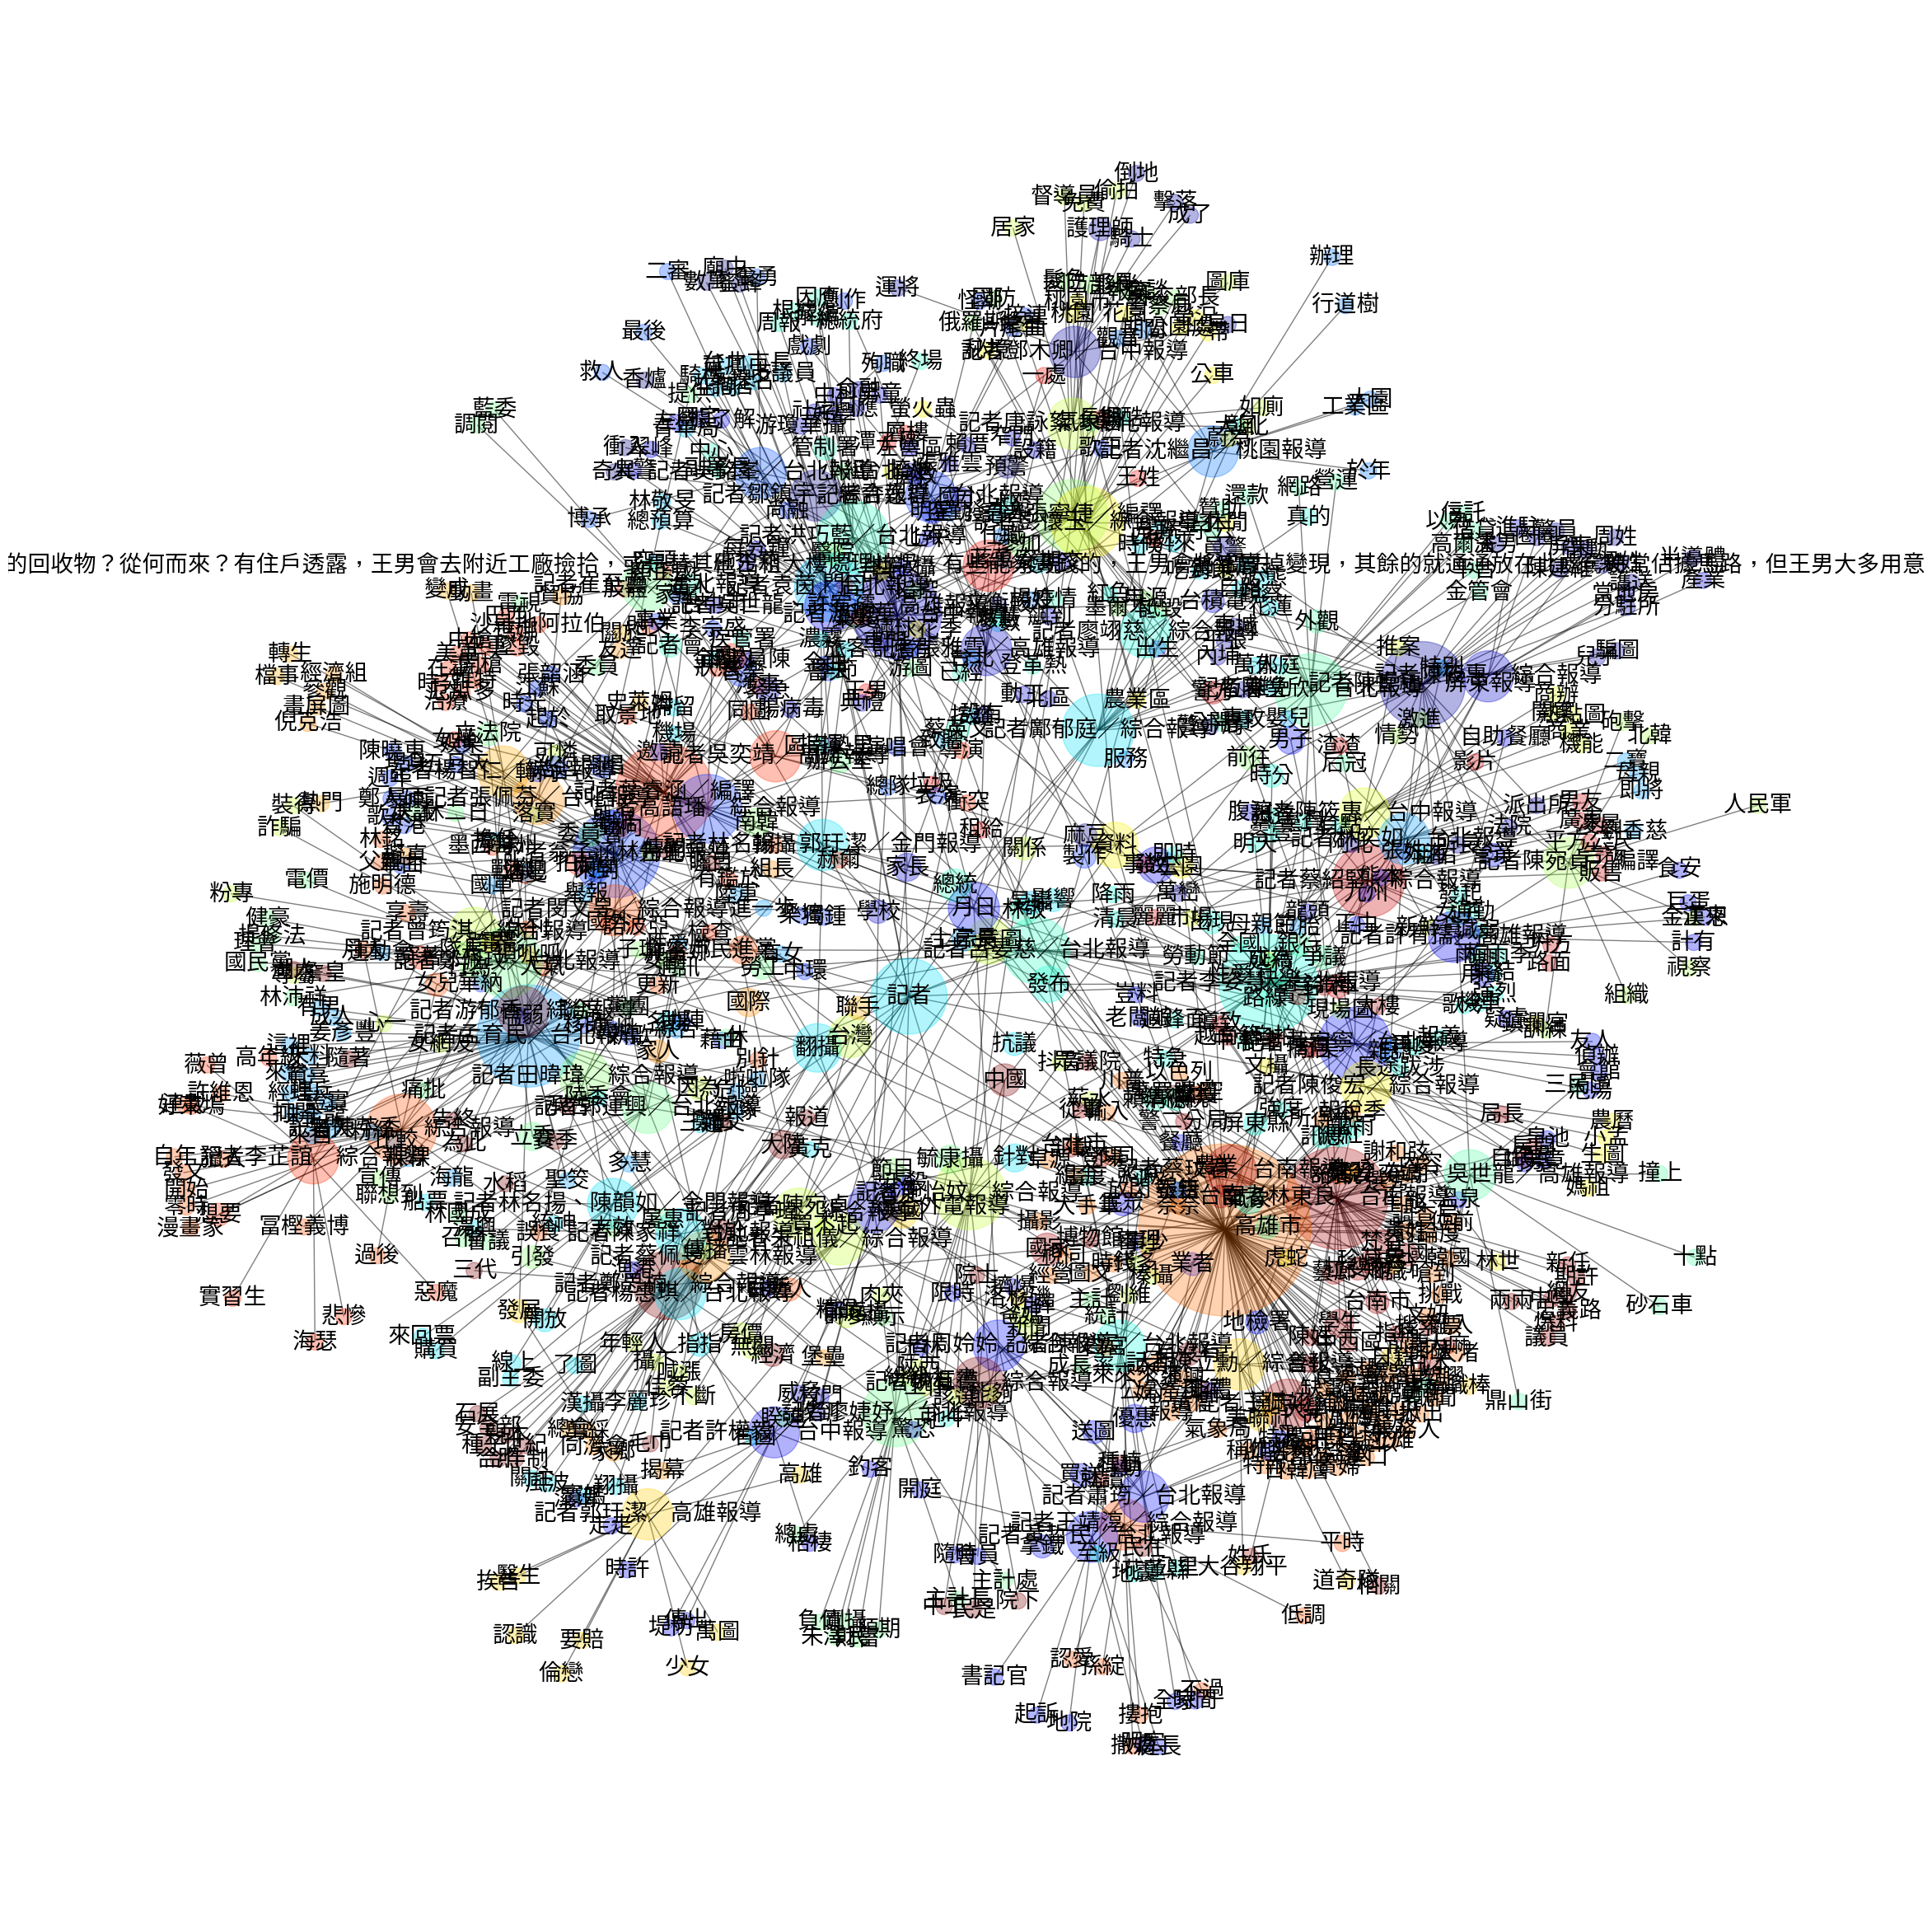

In [117]:
df['content'] = df['content'].apply(bart_summarize)
df['keywords'] = df['content'].apply(extract_keywords)
draw(df)